In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.DataFrame(pd.read_csv("C:/123B2F143/ML/Assig 2 Linear regression/Housing.csv"))

In [3]:
#checking the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Data Inspection**

In [5]:
#data inspection
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Data Cleaning**

In [9]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

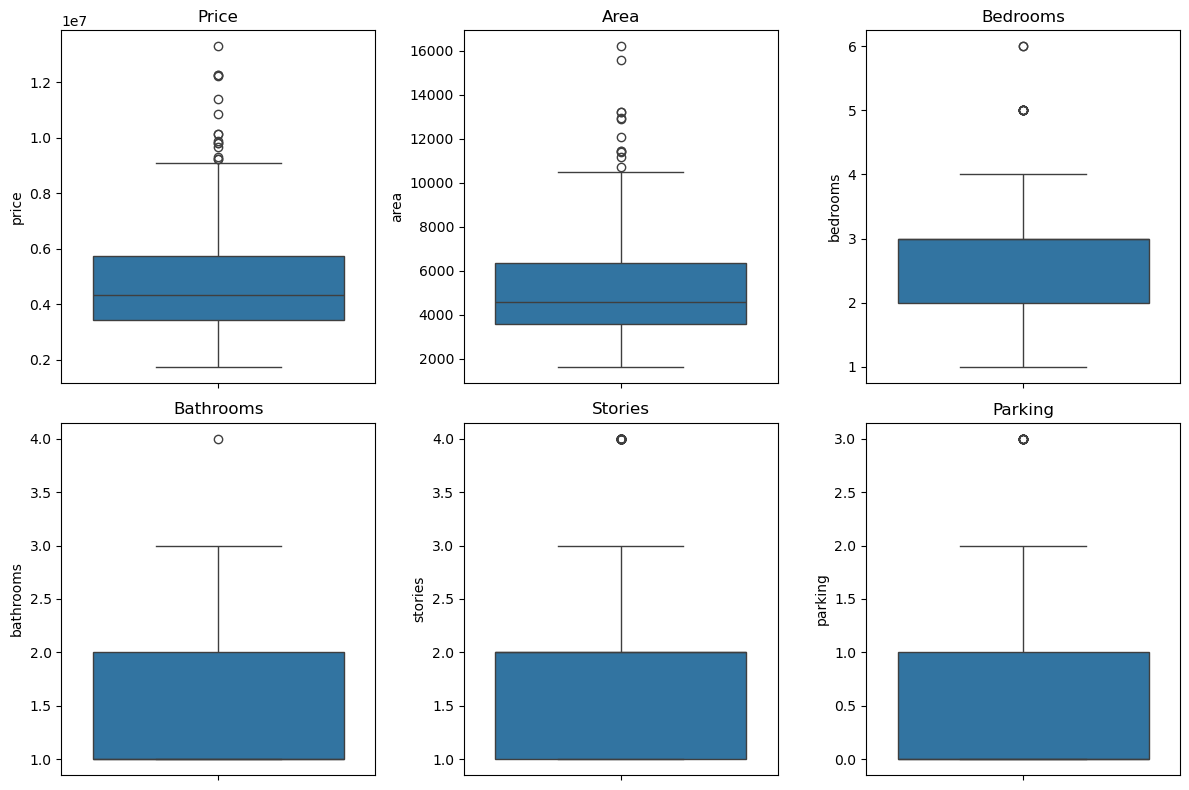

In [10]:
# let's do the outlier analysis

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# First row of boxplots
sns.boxplot(df['price'], ax=axs[0, 0]).set_title("Price")
sns.boxplot(df['area'], ax=axs[0, 1]).set_title("Area")
sns.boxplot(df['bedrooms'], ax=axs[0, 2]).set_title("Bedrooms")

# Second row of boxplots
sns.boxplot(df['bathrooms'], ax=axs[1, 0]).set_title("Bathrooms")
sns.boxplot(df['stories'], ax=axs[1, 1]).set_title("Stories")
sns.boxplot(df['parking'], ax=axs[1, 2]).set_title("Parking")

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [11]:
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

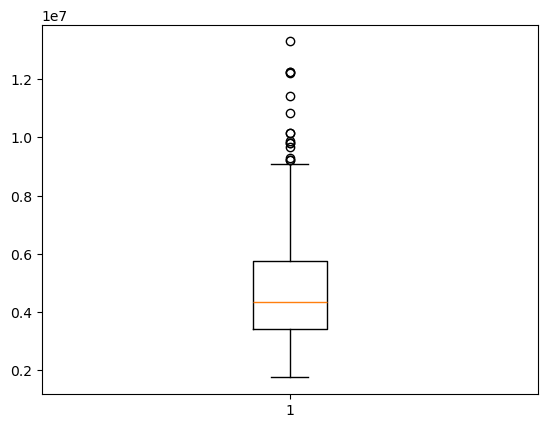

In [12]:
# outlier treatment for price
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

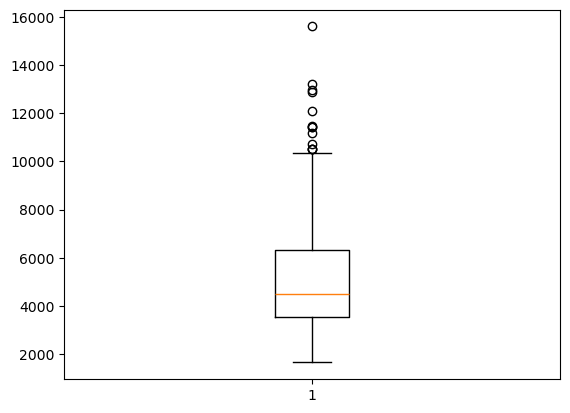

In [13]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

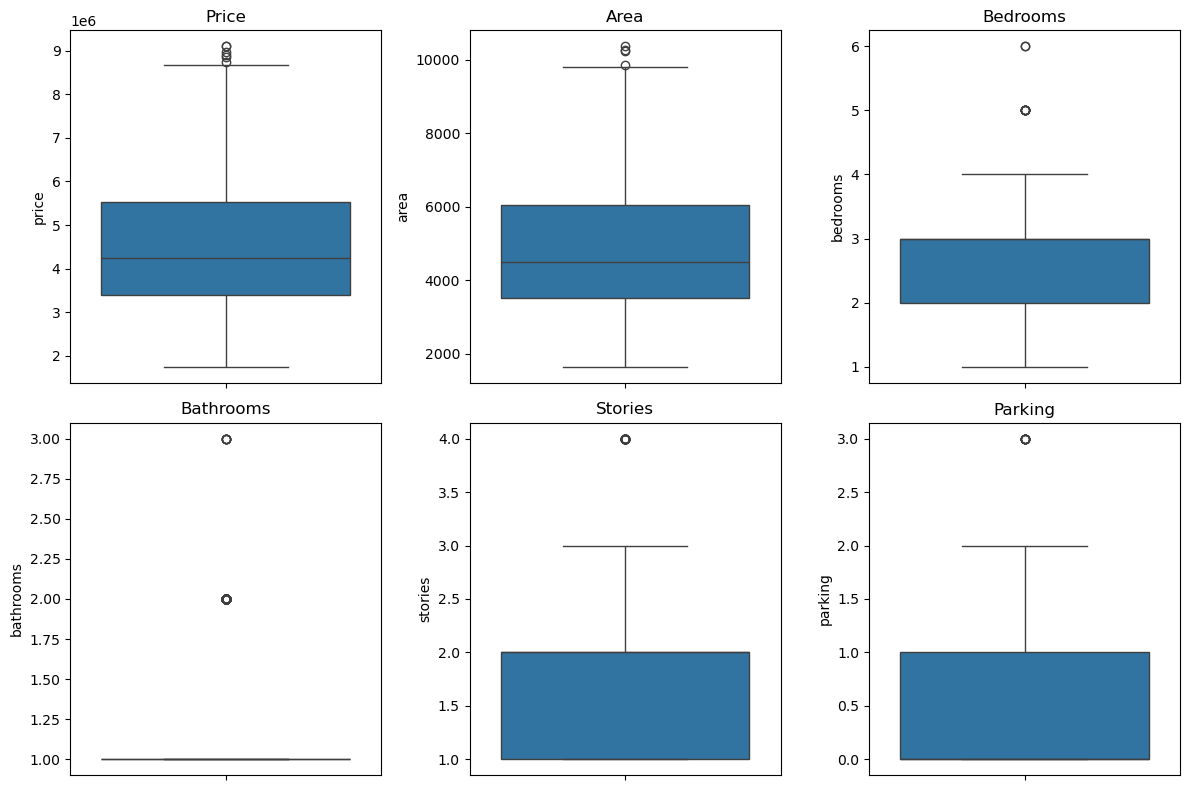

In [14]:
# let's do the outlier analysis again

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# First row of boxplots
sns.boxplot(df['price'], ax=axs[0, 0]).set_title("Price")
sns.boxplot(df['area'], ax=axs[0, 1]).set_title("Area")
sns.boxplot(df['bedrooms'], ax=axs[0, 2]).set_title("Bedrooms")

# Second row of boxplots
sns.boxplot(df['bathrooms'], ax=axs[1, 0]).set_title("Bathrooms")
sns.boxplot(df['stories'], ax=axs[1, 1]).set_title("Stories")
sns.boxplot(df['parking'], ax=axs[1, 2]).set_title("Parking")

# Adjust layout for readability
plt.tight_layout()
plt.show()

**Exploratory Data Analytics**

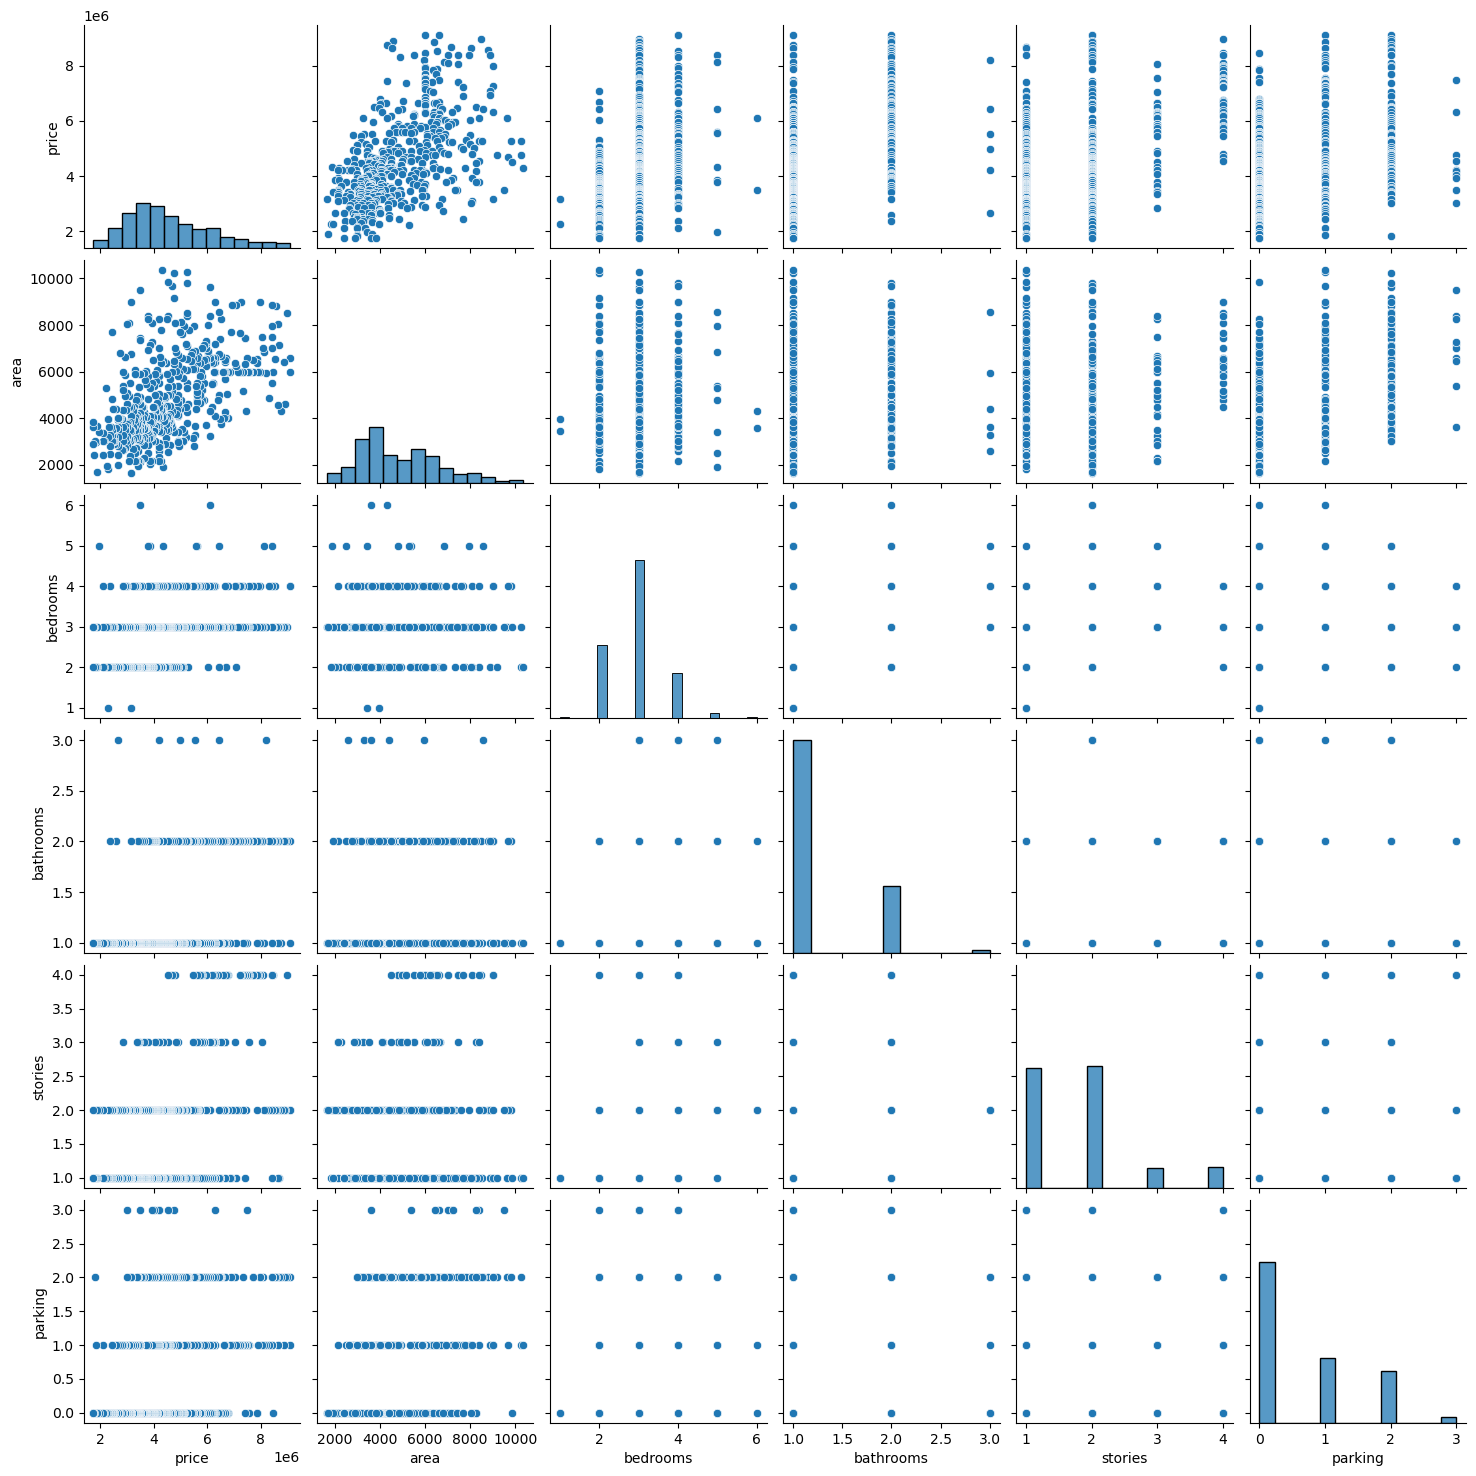

In [16]:
# Visualising Numeric Variables
sns.pairplot(df)
plt.show()

In [35]:
df.head

<bound method NDFrame.head of        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15   9100000  6000         4          1        2      yes        no      yes   
16   9100000  6600         4          2        2      yes       yes      yes   
17   8960000  8500         3          2        4      yes        no       no   
18   8890000  4600         3          2        2      yes       yes       no   
19   8855000  6420         3          2        2      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwa

In [37]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [39]:
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

In [43]:
df[varlist] = df[varlist].apply(binary_map)

In [47]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [49]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [51]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [53]:
df = pd.concat([df, status], axis = 1)

In [55]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [57]:
# Drop 'furnishingstatus' as we have created the dummies for it

df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [59]:
#split the data fro training and testing

In [61]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [67]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [69]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,True,False
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,True,False
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,False,False
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,False,False
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,False,True


In [71]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


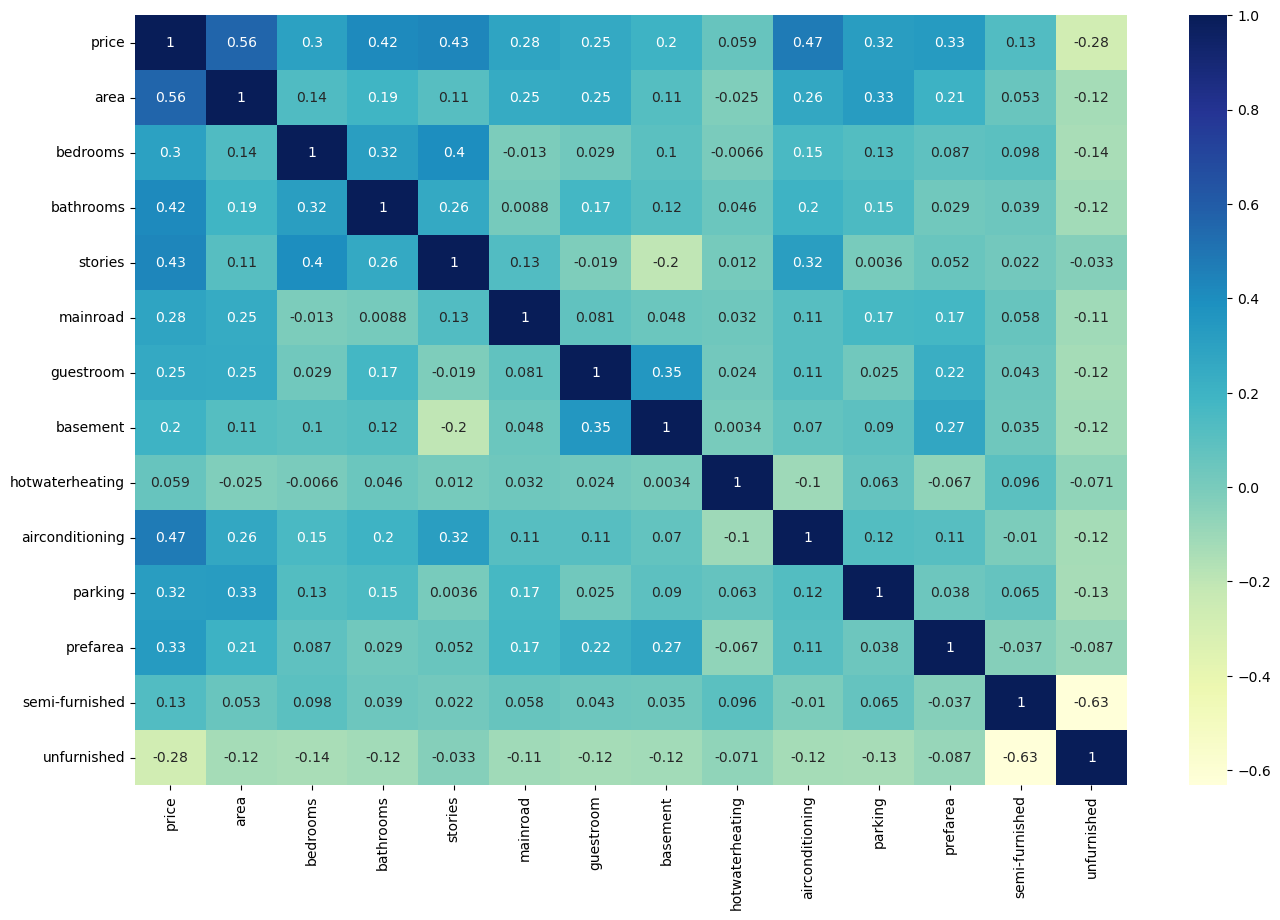

In [73]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [75]:
y_train = df_train.pop('price')
X_train = df_train

In [91]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=6)  # Corrected syntax
rfe = rfe.fit(X_train, y_train)

In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [95]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [97]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [99]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [101]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [103]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [105]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.31e-69
Time:                        10:26:07   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [107]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [109]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [111]:
y_test = df_test.pop('price')
X_test = df_test

In [113]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [115]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [117]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [119]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5791247774397739

Text(0.5, 0.98, 'y_test vs y_pred')

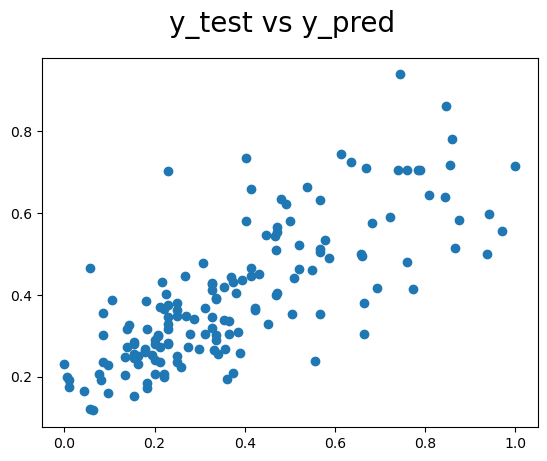

In [121]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  